In [146]:
# https://drive.google.com/file/d/1dYMB7plxsKS5U8yfvec5VWdgLuTc05nR/view

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

### Matplotlib: 
This assignment is for visualization using matplotlib: 
data to use: 

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv  



In [147]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"


#### 1. Create a pie chart presenting the male/female proportion 
    

In [148]:
mf = titanic['sex'].value_counts()

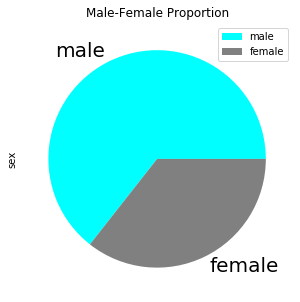

In [149]:
mf.plot.pie(figsize = (5,5),fontsize = 20,title = 'Male-Female Proportion',legend = True,colors = {'gray','cyan'})

#### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 


In [150]:
fa = titanic[['fare','age','sex']]
fa

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female
...,...,...,...
1305,14.4542,NaN,female
1306,7.2250,26.5000,male
1307,7.2250,27.0000,male
1308,7.8750,29.0000,male


## Approach 1

In [151]:
colors = {'male':'cyan', 'female':'grey'}
fa.plot.scatter(x = 'fare',y = 'age',c = fa['sex'].apply(lambda x: colors[x]))

KeyError: nan

# i get error becoz of nan values since i dont what to substitute in place of nan, so i try the approach 2

# Approach 1 fail!!!!!

## Approach 2

<Figure size 720x720 with 0 Axes>

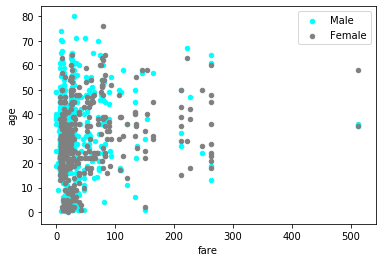

In [152]:
plt.figure(figsize=(10,10))
male_fig = fa[fa.sex == 'male'].plot.scatter('fare','age',color = 'cyan',label = 'Male')
female_fig = fa[fa.sex == 'female'].plot.scatter('fare','age',ax = male_fig,color = 'grey',label = 'Female')

# Approach 2 Success!!!!!

----------------

### Scipy: 
We have the min and max temperatures in a city In India for each months of the year.  We would like to find a function to describe this and show it graphically, the dataset  given below. 

#### Task: 
    1.fitting it to the periodic function 
    2.plot the fit 

#### Data 
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


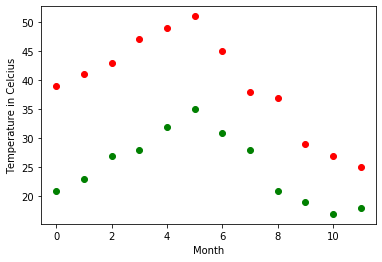

In [153]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)


plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'go')

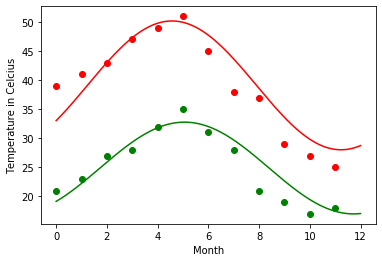

In [154]:
def yearly_temps(times, avg, ampl, time_offset): 
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [40, 20, 0]) 
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

plt.figure()

plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'go')

plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(days, yearly_temps(days, *res_min), 'g-')

plt.xlabel('Month')
plt.ylabel('Temperature in Celcius')

plt.show()